In [80]:
import pandas as pd
import seaborn as sns

In [81]:
from matplotlib import pyplot as plt
%matplotlib inline

In [82]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Описание данных
https://www.kaggle.com/c/titanic/data

Посмотрим на данные.

In [83]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Глянем какие типы у нас есть.

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Простая статистика.

In [85]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Простая статистика по категориальным.

In [86]:
train_df.describe(include=['O'])

Name   Sex Ticket Cabin Embarked
count                                          891   891    891   204      889
unique                                         891     2    681   147        3
top     Strom, Mrs. Wilhelm (Elna Matilda Persson)  male   1601    G6        S
freq                                             1   577      7     4      644

In [87]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [88]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [89]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [90]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

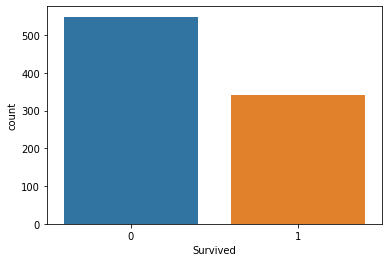

In [91]:
sns.countplot(x='Survived', data=train_df)

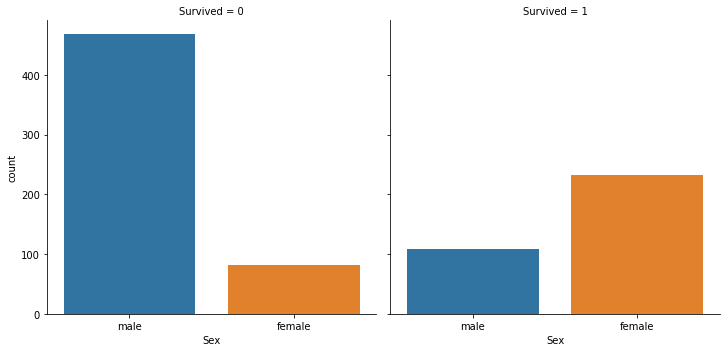

In [92]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train_df)

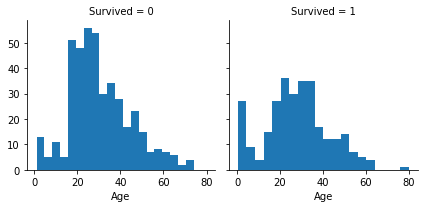

In [93]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/Users/markpotanin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


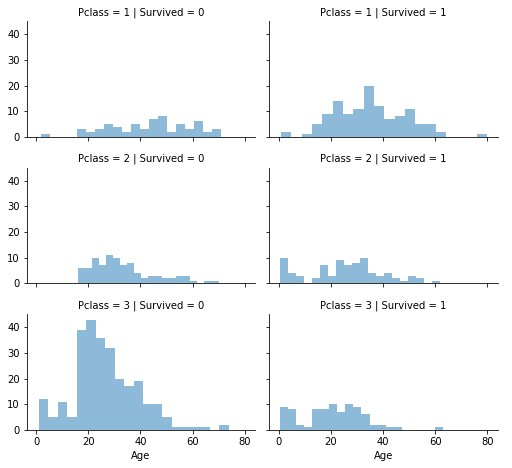

In [94]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Feature engineering

In [95]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [96]:
train_df['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [97]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [98]:
train_df['Ticket'].unique()[:10]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736'], dtype=object)

In [99]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [100]:
train_df['Cabin'].unique()[:10]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [101]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(train_df["Sex"])

encoded_sex_train_df = le_sex.transform(train_df["Sex"])
train_df["Sex"] = encoded_sex_train_df
encoded_sex_test_df = le_sex.transform(test_df["Sex"])
test_df["Sex"] = encoded_sex_test_df

train_df["Embarked"].fillna('None',inplace=True)
le_embarked = LabelEncoder()
le_embarked.fit(train_df["Embarked"])

encoded_embarked_train_df = le_embarked.transform(train_df["Embarked"])
train_df["Embarked"] = encoded_embarked_train_df
encoded_embarked_test_df = le_embarked.transform(test_df["Embarked"])
test_df["Embarked"] = encoded_embarked_test_df

In [102]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         3  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         3  
3            113803  53.1000  C123         3  
4            373450   8.0500   NaN         3

In [103]:
train_df["FamSize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamSize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [104]:
train_df["IsAlone"] = train_df.FamSize.apply(lambda x: 1 if x == 1 else 0)
test_df["IsAlone"] = test_df.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [105]:
train_df['Title']=train_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_df['Title']=test_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [106]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [107]:
train_df.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)
train_df.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
train_df.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [108]:
test_df.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)
test_df.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
test_df.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [109]:
le_title = LabelEncoder()
le_title.fit(train_df["Title"])

encoded_title_train_df = le_title.transform(train_df["Title"])
train_df["Title"] = encoded_title_train_df
encoded_title_test_df = le_title.transform(test_df["Title"])
test_df["Title"] = encoded_title_test_df

In [110]:
train_df=train_df.drop(['Cabin','Ticket','Name'],axis=1)

In [111]:
test_df=test_df.drop(['Cabin','Ticket','Name'],axis=1)

# Three heroes

In [112]:
train_df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    1  22.0      1      0   7.2500         3   
1            2         1       1    0  38.0      1      0  71.2833         0   
2            3         1       3    0  26.0      0      0   7.9250         3   
3            4         1       1    0  35.0      1      0  53.1000         3   
4            5         0       3    1  35.0      0      0   8.0500         3   

   FamSize  IsAlone  Title  
0        2        0      3  
1        2        0      4  
2        1        1      2  
3        2        0      4  
4        1        1      3

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [114]:
X_train, X_test,y_train,y_test = train_test_split(train_df.drop('Survived',axis=1),train_df['Survived'],random_state=2)

### xgboost

In [115]:
from xgboost import XGBClassifier

In [116]:
eval_set = [(X_train,y_train),(X_test,y_test)]

In [117]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
print(roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

0.8583222701626286


In [119]:
from eli5 import show_weights

In [120]:
show_weights(model)

In [121]:
predictions=model.predict_proba(test_df)

In [122]:
submission=pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':predictions[:,1]})
submission.head()

PassengerId  Survived
0          892  0.038305
1          893  0.197608
2          894  0.061995
3          895  0.088219
4          896  0.307499

In [52]:
#submission.to_csv('titanic_submission.csv', header = True, index = False)

### lightgbm

In [54]:
import lightgbm as lgb
import numpy as np

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [55]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

lgbm_params = {
    'objective': 'binary',
    'metric': 'auc'
}
evaluation_results={}
model = lgb.train(lgbm_params, lgb_train,  valid_sets=[lgb_train, lgb_eval], 
                 valid_names=['Train', 'Test'],
                 evals_result=evaluation_results)

y_pred = model.predict(X_test)

[1]	Train's auc: 0.905928	Test's auc: 0.808497
[2]	Train's auc: 0.90966	Test's auc: 0.823639
[3]	Train's auc: 0.909833	Test's auc: 0.819159
[4]	Train's auc: 0.913517	Test's auc: 0.830443
[5]	Train's auc: 0.916105	Test's auc: 0.841728
[6]	Train's auc: 0.920632	Test's auc: 0.841396
[7]	Train's auc: 0.920469	Test's auc: 0.842599
[8]	Train's auc: 0.923689	Test's auc: 0.84542
[9]	Train's auc: 0.929957	Test's auc: 0.852887
[10]	Train's auc: 0.931976	Test's auc: 0.860521
[11]	Train's auc: 0.933713	Test's auc: 0.86106
[12]	Train's auc: 0.936344	Test's auc: 0.862844
[13]	Train's auc: 0.937684	Test's auc: 0.864836
[14]	Train's auc: 0.939029	Test's auc: 0.867076
[15]	Train's auc: 0.941923	Test's auc: 0.867615
[16]	Train's auc: 0.942976	Test's auc: 0.869856
[17]	Train's auc: 0.944234	Test's auc: 0.866039
[18]	Train's auc: 0.946651	Test's auc: 0.865209
[19]	Train's auc: 0.947785	Test's auc: 0.865914
[20]	Train's auc: 0.948718	Test's auc: 0.864753
[21]	Train's auc: 0.950416	Test's auc: 0.866163
[22]

In [56]:
print(roc_auc_score(y_test,y_pred))

0.8467474278128112


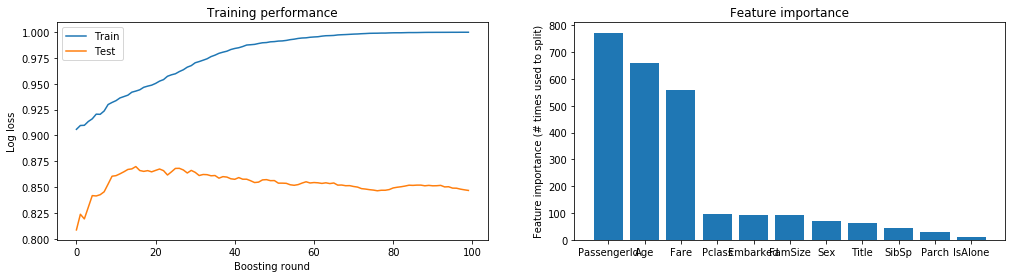

In [59]:
fig, axs = plt.subplots(1, 2, figsize=[17, 4])

# Plot the log loss during training
axs[0].plot(evaluation_results['Train']['auc'], label='Train')
axs[0].plot(evaluation_results['Test']['auc'], label='Test')
axs[0].set_ylabel('Log loss')
axs[0].set_xlabel('Boosting round')
axs[0].set_title('Training performance')
axs[0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': model.feature_name(), 
                            'importance': model.feature_importance()}).sort_values('importance', ascending=False)
axs[1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1].set_xticks(np.arange(len(importances)))
axs[1].set_xticklabels(importances['features'])
axs[1].set_ylabel('Feature importance (# times used to split)')
axs[1].set_title('Feature importance')

plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
param_grid = {'n_estimators':[20,100,500],'max_depth':[2,5,10]} 
grs = GridSearchCV(model, param_grid=param_grid, cv = 10, n_jobs=4, return_train_score = False)
grs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20, 100, 500], 'max_depth': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [62]:
grid_search_preds=grs.predict_proba(X_test)[:,1]

In [63]:
print(roc_auc_score(y_test.values,grid_search_preds))

0.8474941918353799


## catboost

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [64]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [65]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)

In [67]:
X_train, X_test,y_train,y_test = train_test_split(train_df.drop('Survived',axis=1),train_df['Survived'],random_state=2)

In [68]:
X_train.head()

PassengerId  Pclass                                          Name  \
199          200       2        Yrois, Miss. Henriette ("Mrs Harbeck")   
129          130       3                            Ekstrom, Mr. Johan   
90            91       3                          Christmann, Mr. Emil   
230          231       1  Harris, Mrs. Henry Birkhardt (Irene Wallach)   
126          127       3                           McMahon, Mr. Martin   

        Sex   Age  SibSp  Parch    Fare Embarked  
199  female  24.0      0      0  13.000        S  
129    male  45.0      0      0   6.975        S  
90     male  29.0      0      0   8.050        S  
230  female  35.0      1      0  83.475        S  
126    male   NaN      0      0   7.750        Q

In [70]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [71]:
categorical_features_indices = [1,2,3,8]

In [72]:
X_train.iloc[:,categorical_features_indices]=X_train.iloc[:,categorical_features_indices].fillna('nan')

In [73]:
X_test.iloc[:,categorical_features_indices]=X_test.iloc[:,categorical_features_indices].fillna('nan')

In [74]:
from catboost import Pool, CatBoostClassifier

In [75]:
model=CatBoostClassifier(iterations=100,learning_rate=1,\
            depth=8,eval_metric='AUC')

In [76]:
model.fit(X_train,y_train,plot=True,cat_features=categorical_features_indices,eval_set=(X_test,y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7723199	best: 0.7723199 (0)	total: 99.4ms	remaining: 9.84s
1:	test: 0.8447975	best: 0.8447975 (1)	total: 154ms	remaining: 7.54s
2:	test: 0.8592765	best: 0.8592765 (2)	total: 177ms	remaining: 5.72s
3:	test: 0.8652921	best: 0.8652921 (3)	total: 195ms	remaining: 4.67s
4:	test: 0.8641304	best: 0.8652921 (3)	total: 215ms	remaining: 4.08s
5:	test: 0.8569947	best: 0.8652921 (3)	total: 235ms	remaining: 3.68s
6:	test: 0.8535513	best: 0.8652921 (3)	total: 258ms	remaining: 3.42s
7:	test: 0.8535513	best: 0.8652921 (3)	total: 275ms	remaining: 3.16s
8:	test: 0.8421009	best: 0.8652921 (3)	total: 295ms	remaining: 2.99s
9:	test: 0.8438433	best: 0.8652921 (3)	total: 368ms	remaining: 3.31s
10:	test: 0.8471623	best: 0.8652921 (3)	total: 408ms	remaining: 3.3s
11:	test: 0.8448390	best: 0.8652921 (3)	total: 440ms	remaining: 3.23s
12:	test: 0.8427647	best: 0.8652921 (3)	total: 471ms	remaining: 3.15s
13:	test: 0.8311898	best: 0.8652921 (3)	total: 505ms	remaining: 3.1s
14:	test: 0.8125207	best: 0.865